# Part 0: Create Population by Continent Image  
Use `dissolve` in the code cell below to create this graph.
![continents](./pop_by_cont.png)

<Axes: >

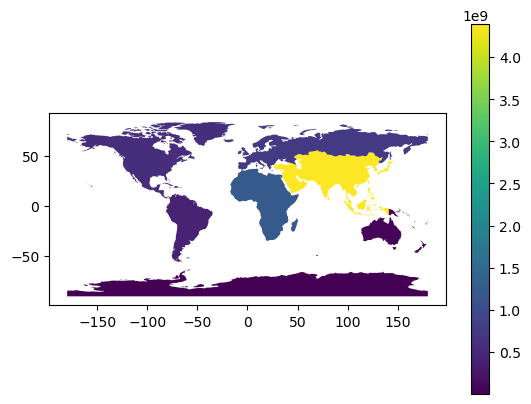

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

gdf = gpd.read_file('geo_data/ne_110m_admin_0_countries.shp')

# Filter down to just the columns of interest
populations = gdf[['POP_EST', 'CONTINENT', 'geometry']]

populations = populations.dissolve(by='CONTINENT', aggfunc='sum')
# Use the dissolve operation: dissolve(by='', aggfunc='')

# Then plot the result
populations.plot('POP_EST', legend=True)


# Part 1: Use groupby to plot population
We can get close to the above graph (created with a `dissolve`) by using `groupby` first. But, the `groupby` results in a `series` object. We need to add that series back to the GeoDataFrame. The goal would be to get a graph that looks like the following. Note that the country borders are present. ![continents](./pop_by_country.png)

**But, we have a problem...**   

The `series` won't easily attach. This line of code fails:
```python
gdf['pop'] = pop_series
```

How do you fix this? Complete the code below.

Text(0.5, 1.0, 'The Continents w/ Country Borders')

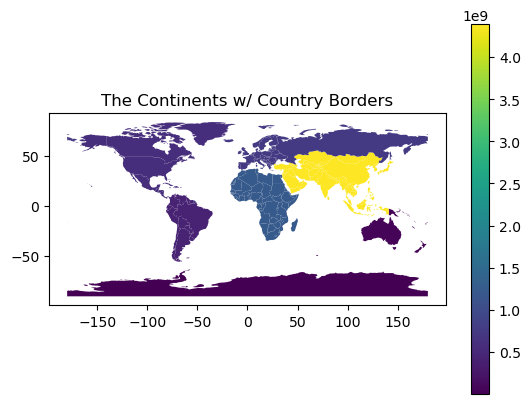

In [2]:
# calculate the sum of each country to get the continent population. Returns a series
pop_series = gdf.groupby('CONTINENT')['POP_EST'].sum()
trunkated = gdf[['CONTINENT', 'geometry']]

# add the series to the GeoDataFrame. There is an error.
# First, understand what the issue is. Can you decipher the error message?
# There is a way to construct what you need. Replace this line of code.
# Hint: create a list
merged = trunkated.merge(pop_series, left_on='CONTINENT', right_on='CONTINENT')

# Once solved, we plot the result
merged.plot(column='POP_EST', legend=True)
plt.title('The Continents w/ Country Borders')

# Part 2A: Exploring Merge 
It's time to explore merging dataframes. In the code cell below two datasets are prepared to represent Students and Teachers. You need to practice joining the tables together in various ways.

> Note: You can trim down the columns in a dataset and rename the columns as follows:
```python
# trim to just two columns. Rename 't_name' to 'teacher'
result[['student_name', 't_name']].rename(columns={'t_name': 'teacher'})
```

## Activity
<ol>
    <li>Create the datasets below using multiple joins</li>
    <li>Trim the count of columns and rename them to better names</li>
    <li>Take note of the rows with NaN and when that is better/worse</li>
    <li>Predict which rows will be present before executing the code</li>
</ol>
Datasets: 
<ul>
    <li>Students and their Advisory Teachers</li>
    <li>Teachers with their TAs</li>
</ul>




In [3]:
import pandas as pd

# This just sets up the datasets (aka: tables or dataframes)
st_data = { 'student_name': ['Nikhil', 'Cassie', 'Juliette'],
            'student_id':   [ 1, 2, 3],
            'advisory_id':  [ 2, 4, 5]}

students = pd.DataFrame(data=st_data)
teacher_data = { 't_name': ['Stride', 'Harrison', 'Olsen', 'Teachout', 'Seeley'],
                 't_id':   [ 1, 2, 3, 4, 5],
                 'ta_id':  [ 1, 3, 4, 0, 1]}
teachers = pd.DataFrame(data=teacher_data)

In [4]:
# create a table of student names with the names of their advisory teacher
table = students.merge(teachers, left_on='advisory_id', right_on='t_id', how='left')
table = table[['student_name', 't_name']]
table

,student_name,t_name
0,Nikhil,Harrison
1,Cassie,Teachout
2,Juliette,Seeley


In [5]:
# create a table of Teachers with their TAs
tas = teachers.merge(students, left_on='ta_id', right_on='student_id', how='left')
tas = tas[['t_name', 'student_name']]
tas

,t_name,student_name
0,Stride,Nikhil
1,Harrison,Juliette
2,Olsen,NaN
3,Teachout,NaN
4,Seeley,Nikhil


## Part 2B: Same thing...
In the code cell below, the datasets are slightly modified so that you can see how the joins work when there are multiple keys in the right dataset. Practice doing all types of joins. 

In [12]:
# to see a left join with a repetition, let's change the data a bit
# create a TA_GROUP and students belong to the TA_GROUP
st_data = { 'student_name': ['Nikhil', 'Cassie', 'Juliette'],
            'student_id':   [ 1, 2, 3],
            'advisory_id':  [ 2, 4, 5],
            'ta_group_id':  [ 1, 2, 1]}
students = pd.DataFrame(data=st_data)

teacher_data = { 't_name': ['Stride', 'Harrison', 'Olsen', 'Teachout', 'Seeley'],
                 't_id':   [ 1, 2, 3, 4, 5],
                 'ta_id':  [ 1, 3, 4, 2, 1]}
teachers = pd.DataFrame(data=teacher_data)


In [17]:
tas = teachers.merge(students, left_on='ta_id', right_on='student_id', how='right')
tas = tas[['t_name', 'student_name']]
tas

,t_name,student_name
0,Stride,Nikhil
1,Seeley,Nikhil
2,Teachout,Cassie
3,Harrison,Juliette


In [7]:
# # join the tables together again and note the results
joined = students.merge(teachers, left_on='ta_group_id', right_on='t_id')
joined

,student_name,student_id,advisory_id,ta_group_id,t_name,t_id,ta_id
0,Nikhil,1,2,1,Stride,1,1
1,Juliette,3,5,1,Stride,1,1
2,Cassie,2,4,2,Harrison,2,3


# Part 3: Use Join after groupby
Above we did a `groupby` to get a series object and then added it to the GeoDataFrame before plotting it. In order to add it, we created a `list` of the correct length with the correct data. But now we have more tools available to us. We can do a `merge` (join) to add the series to the GeoDataFrame.  

Complete the code below to generate the same graph as above.
> ERROR: The merge works great. ARRG!! The plot fails. Yes, I set you up for this failure. But, you are now tasked to fix it. First, try to understand the error. Investigate by printing stuff. Then, implement your favorite fix... there are at least 3.

,CONTINENT,geometry
0,Oceania,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Africa,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Africa,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,North America,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,North America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Europe,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Europe,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Europe,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,North America,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


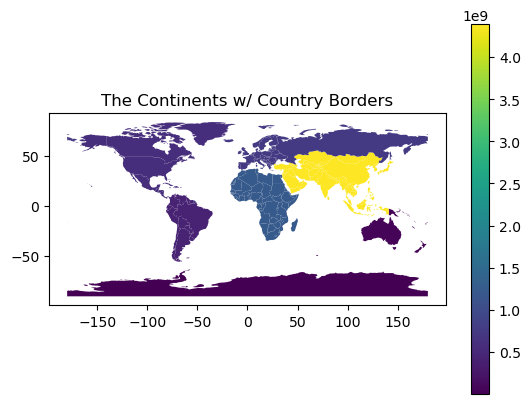

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline

gdf = gpd.read_file('geo_data/ne_110m_admin_0_countries.shp')

# get a series that groups by the population
# calculate the sum of each continent. Returns a series with 7 rows (1 per continent)
pop_series = gdf.groupby('CONTINENT')['POP_EST'].sum()

# Filter down to just the columns of interest since merge works on all columns
populations = gdf[['CONTINENT', 'geometry']]

# Do a join to generate a new dataframe 
final = populations.merge(pop_series, left_on='CONTINENT', right_on='CONTINENT')

# Then plot the result
final.plot(column='POP_EST', legend=True)
plt.title('The Continents w/ Country Borders')
populations

# Part 4: Affected States
In lesson 20, Hurricane Florence, a plot of the affected states is drawn. Run the code cell below to see what it looks like.

## Activity : Understand and Explain
All of the code is provided for you in the Code Cell below. Answer the following questions:  

**Question #1A**: When creating the `affected_states` why is `inner` the correct join? Explain why `left` and `right` are incorrect.
> We need to use inner because it only takes the values that are in both left and right columns, dropping the rest. We only want to highlight the states that the huricane has effected, and drop the rest, therefore inner is the best. Left and right would include states unaffected by the hurricane and the hurricane points itself.

**Question #1B**: How many rows are in the dataset `affected_states`? Is there any benefit to reducing the dataset so that each state appears only once? Can you figure out a way to do this correctly?
> There are 5 rows in this dataset. We can reduce the dataset by using affected_states.dissolve(by='NAME'). The benefit of this is that the dataset is smaller and easier to handle. It also likely decreases the processing time when plotting.

**Question #2**: Why is it necessary to create a figure with the API `subplots`? 
> It allows us to create a singular axis so that both of our plots are on the same graph. Removing that line of code would create a seperate plot of the US and a seperate plot of the hurricane's movement. We want both of these to be on top of each other, which is why we use the API subplots to specify how many axis' we need and the size of it.

**Question #3**: What is the purpose of plotting the country with `color='#EEEEEE'`?
> If we plotted the country with the color white, it would blend in with the background. This color is a light gray that allows the user to see it on top of the white background. The edge color is white and allows us to see the grid pattern of the states.

**Question #4**: What happens when you reverse the order of these two plots? Why does that happen?
> The US is plotted on top of the hurricane dots and you can no longer see where the hurricane goes. This happens because we are plotting on the same axis and python runs line by line. Essentially, it plots the hurricane's path first and then the US on top of that, making the hurricane path covered.

c:\Users\1115575\.conda\envs\IDP3\lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

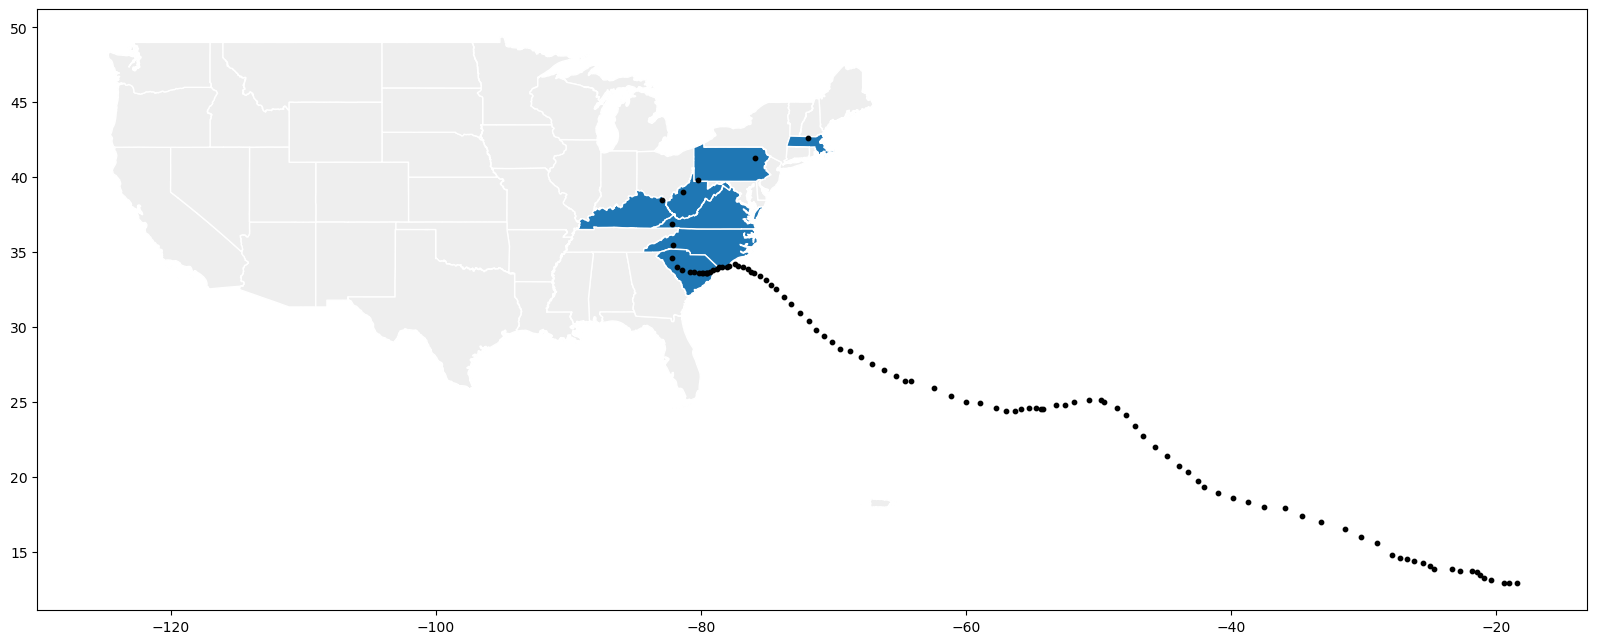

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

# Load in US Data
country = gpd.read_file("gz_2010_us_040_00_5m.json")
country = country[(country['NAME'] != 'Alaska') & (country['NAME'] != 'Hawaii')]

# Load in Florence data
florence = pd.read_csv('stormhistory.csv')
florence['coordinates'] = [Point(-long, lat) for long, lat in 
                           zip(florence['Long'], florence['Lat'])]
florence = gpd.GeoDataFrame(florence, geometry='coordinates')
# Advanced: Need to specify map projection points so we can join them later
florence.crs = country.crs 

# Do a Spatial Join on the two datasets
# It is a static method in the GeoPandas module
# Code related to questions #1A and #1B:
affected_states = gpd.sjoin(country, florence, how='inner', op='intersects')
affected_states = affected_states.dissolve(by='NAME')
# print(affected_states)
# Code related to question #2:
fig, ax = plt.subplots(1, figsize=(20, 10))

# Code related to question #3
country.plot(ax=ax, color='#EEEEEE', edgecolor='#FFFFFF')

# Code related to question #4
affected_states.plot(ax=ax, edgecolor='#FFFFFF')
florence.plot(ax=ax, color='#000000', markersize=10)